In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
im = cv.imread('imagenes/letras1.tif')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, cv.THRESH_OTSU)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


In [18]:
print('Total number of contours detected: ' + str(len(contours)))

Total number of contours detected: 2


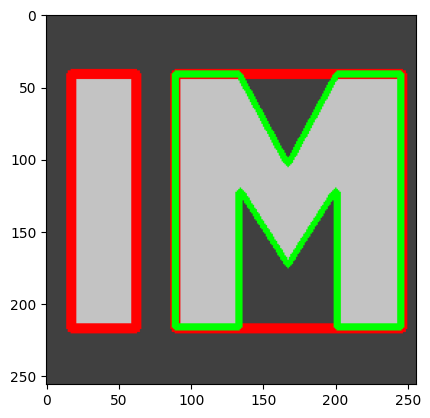

In [26]:
cv.drawContours(im, contours, -1, (0,255,0), 3)
x, y, w, h = cv.boundingRect(contours[1])
cv.rectangle(im,(x,y), (x+w,y+h), (255,0,0), 5)
cv.imshow('First contour with bounding box', im)
plt.imshow(im)

In [34]:
#grayscale
gray = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
cv.waitKey(0)

#binarize 
ret,thresh = cv.threshold(gray,127,255,cv.THRESH_BINARY_INV)
cv.waitKey(0)

#find contours
ctrs, hier = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, 
cv.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv.boundingRect(ctr)

    # Getting ROI
    roi = im[y:y+h, x:x+w]

    # show ROI
    #cv.imwrite('roi_imgs.png', roi)
    cv.imshow('charachter'+str(i), roi)
    cv.rectangle(im,(x,y),( x + w, y + h ),(90,0,255),2)
    cv.waitKey(0)

cv.imshow('marked areas',im)
cv.waitKey(0)